In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective. Taken from (https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv)

### Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

### Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

### Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

#### Citation
<b>Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019</b>

In [3]:
df = pd.read_csv('gr_admission1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Here we are lucky that there is no missing value.

In [5]:
for i in df.columns:
    print(i, ':', df[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


For the columns with unique values less than 10, we will do the countplot, whereas GRE Score, TOELF Score, CGPA and Chance of Admit will plotted using the distribution plot.

In [4]:
grup1 = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']
grup2 = ['University Rating', 'SOP', 'LOR ', 'Research']

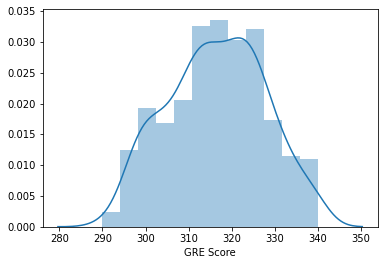

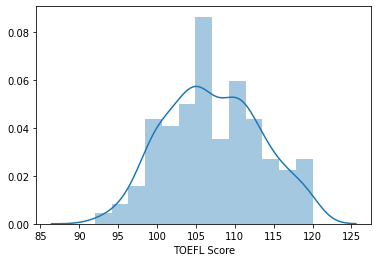

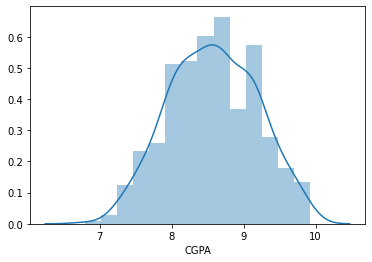

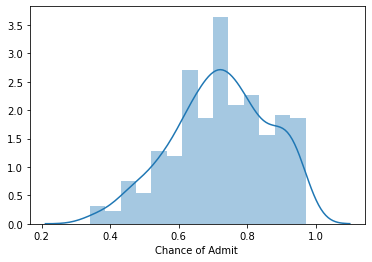

In [16]:
for i in grup1:
    sns.distplot(df[i])
    plt.show()

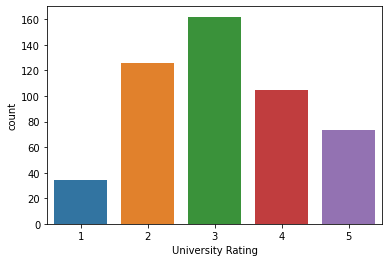

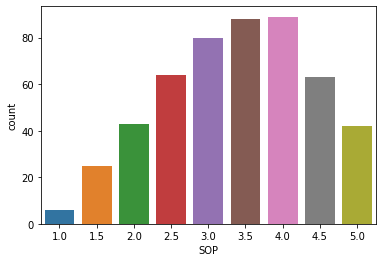

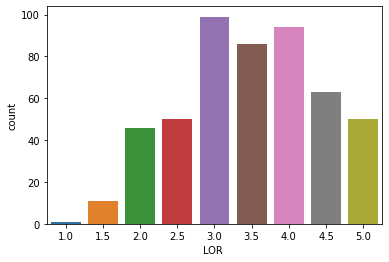

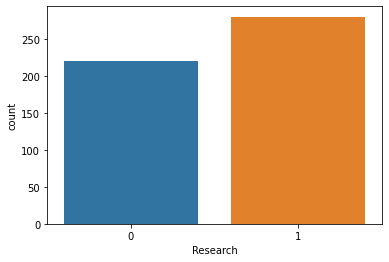

In [17]:
for i in grup2:
    sns.countplot(df[i])
    plt.show()

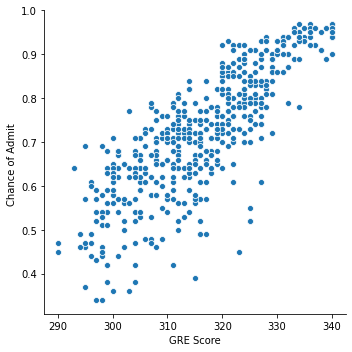

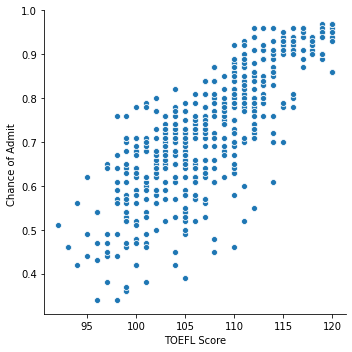

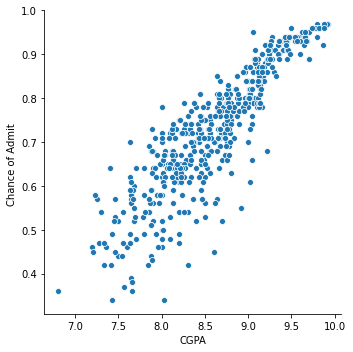

In [9]:
for i in grup1:
    if i == 'Chance of Admit ':
        pass
    else:
        sns.relplot(x=i, y="Chance of Admit ", data=df);
        plt.show()

Here we see that the pattern of the numerical attributes are similar, the higher the value of CGPA, TOEFL score, and GRE score, the better the Chance of Admit.

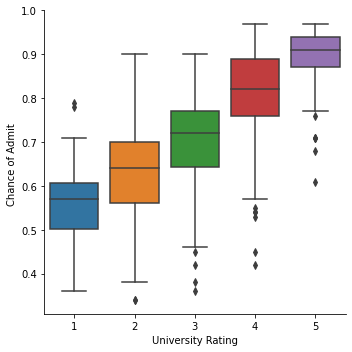

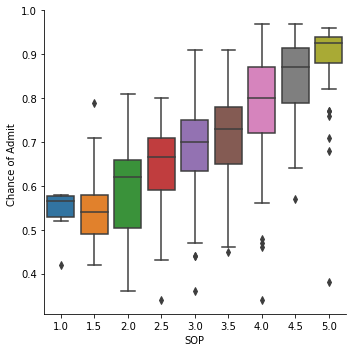

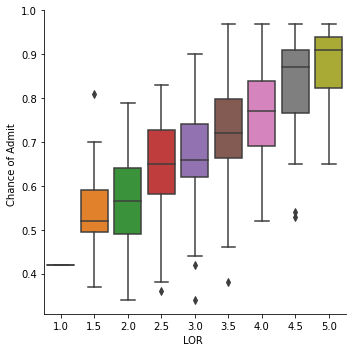

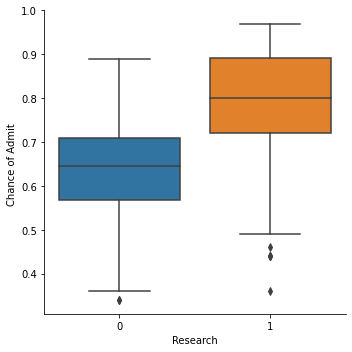

In [8]:
for i in grup2:
    sns.catplot(x=i, y="Chance of Admit ", kind="box", data=df);

The same goes for the categorical variables, particularly in university rating, LOR and SOP, the trend is showing that the higher the value, we got a better Chance of Admit. As for research experience, it seems like people with an experience might gave better chance of Admit as well. But in order to make sure the differences between them, we may need to use statistical test.

Let's try to use statistical test to check whether having research experience significantly increase the Chance of Admit. First we need to make sure that the data follow several assumptions: 1. independency (yes); 2. normal distribution; 3. homogeneity of variance

In [6]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

In [7]:
res = df[df['Research'] == 1]['Chance of Admit ']
no_res = df[df['Research'] == 0]['Chance of Admit ']

In [15]:
# normality tests

print ('Research experience')
shapiro(res)[1]

Research experience


3.87098246790174e-08

In [16]:
#normality test
print ('No research experience')
shapiro(no_res)[1]

No research experience


0.007275211159139872

Both of the groups are not following the normality test. To be able to use t-test, all assumptions should be met. Thus in this case we will use the non-parametric approach for 2 groups, mann whitney U.

In [17]:
result = list(mannwhitneyu(res, no_res))
print('Mann Whitney U Research Experience')
print('U-Statistic:', result[0])
print('P-Value:', result[1], '\n')

Mann Whitney U Research Experience
U-Statistic: 10540.0
P-Value: 6.615275731076634e-37 



According to non-parametric test Mann Whitney U, the p-value is less than 0.05 (even less than 0.01!!), which indicated that there is a significant difference between the Chance of Admit for someone with research experience and without research experience. 

In [18]:
# since serial number is similar like id number, we will drop it
df = df.drop('Serial No.', axis = 1)

In [20]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


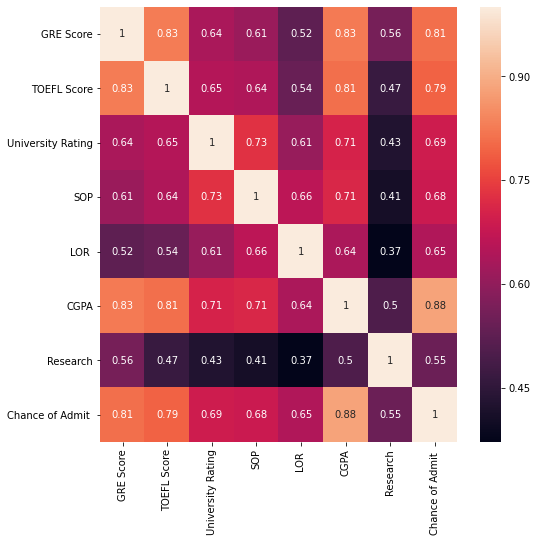

In [26]:
## correlation - pearson
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)

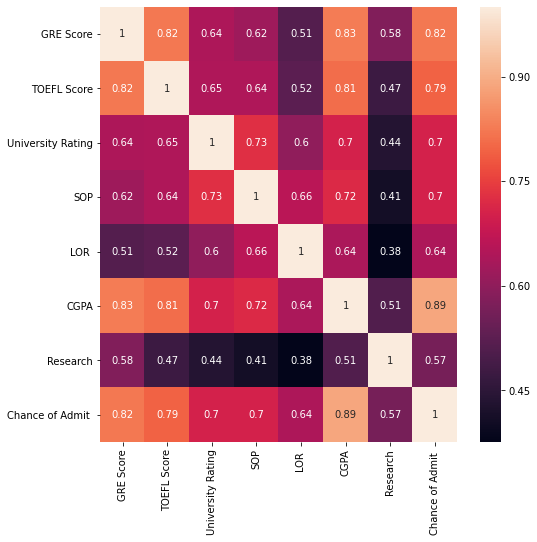

In [27]:
## correlation - spearman
## There is not much difference using this method
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(method = 'spearman'), annot = True)

Based on the correlation test, both Spearman and Pearson methods showed a similar result. CGPA is the one with the highest correlation value towards Chance of Admit. With this in mind, probably we need to use non-parametric approach for the machine learning model.

In [35]:
## To make it easier let's make new column about the raw classification of the chance of admit 
## High if 'Chance of Admit ' > 0.5
## Low if 'Chance of Admit ' < 0.5

df['Chance'] = df['Chance of Admit '].apply(lambda x: 'High' if x > 0.5 else 'Low')

In [36]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92,High
1,324,107,4,4.0,4.5,8.87,1,0.76,High
2,316,104,3,3.0,3.5,8.00,1,0.72,High
3,322,110,3,3.5,2.5,8.67,1,0.80,High
4,314,103,2,2.0,3.0,8.21,0,0.65,High


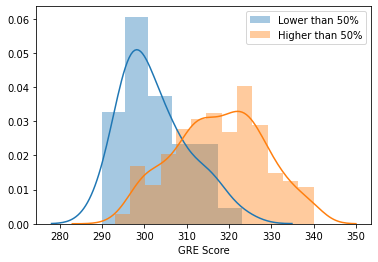

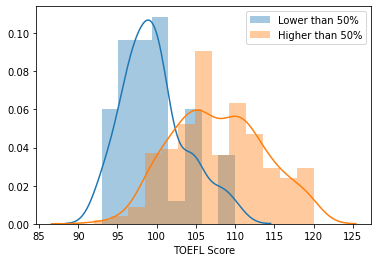

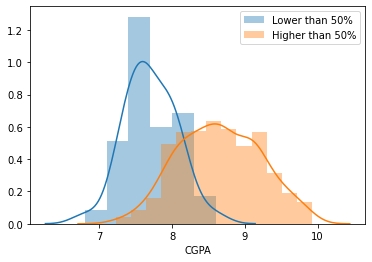

In [38]:
## Let's visualize once again against Chance

for i in grup1:
    if i == 'Chance of Admit ':
        pass
    else:
        sns.distplot(df[df['Chance'] == 'Low'][i], label = 'Lower than 50%')
        sns.distplot(df[df['Chance'] == 'High'][i], label = 'Higher than 50%')
        plt.legend()
        plt.show()

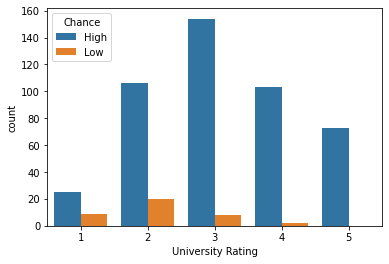

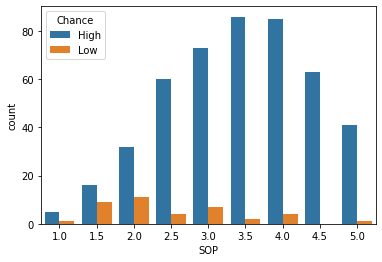

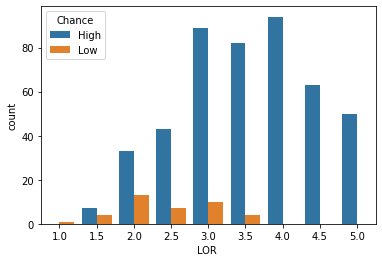

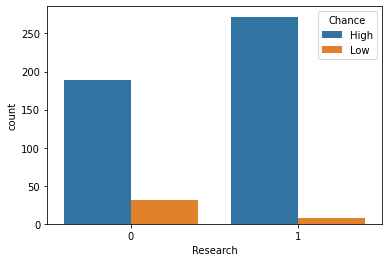

In [39]:
for i in grup2:
    sns.countplot(x = i, hue = 'Chance', data = df)
    plt.show()

In [40]:
df['Chance'].value_counts()

High    461
Low      39
Name: Chance, dtype: int64

There is a class imbalance here (^_^)! But this is not a classification problem, we will use regression to calculate the Chance of Admit in any given situation. 

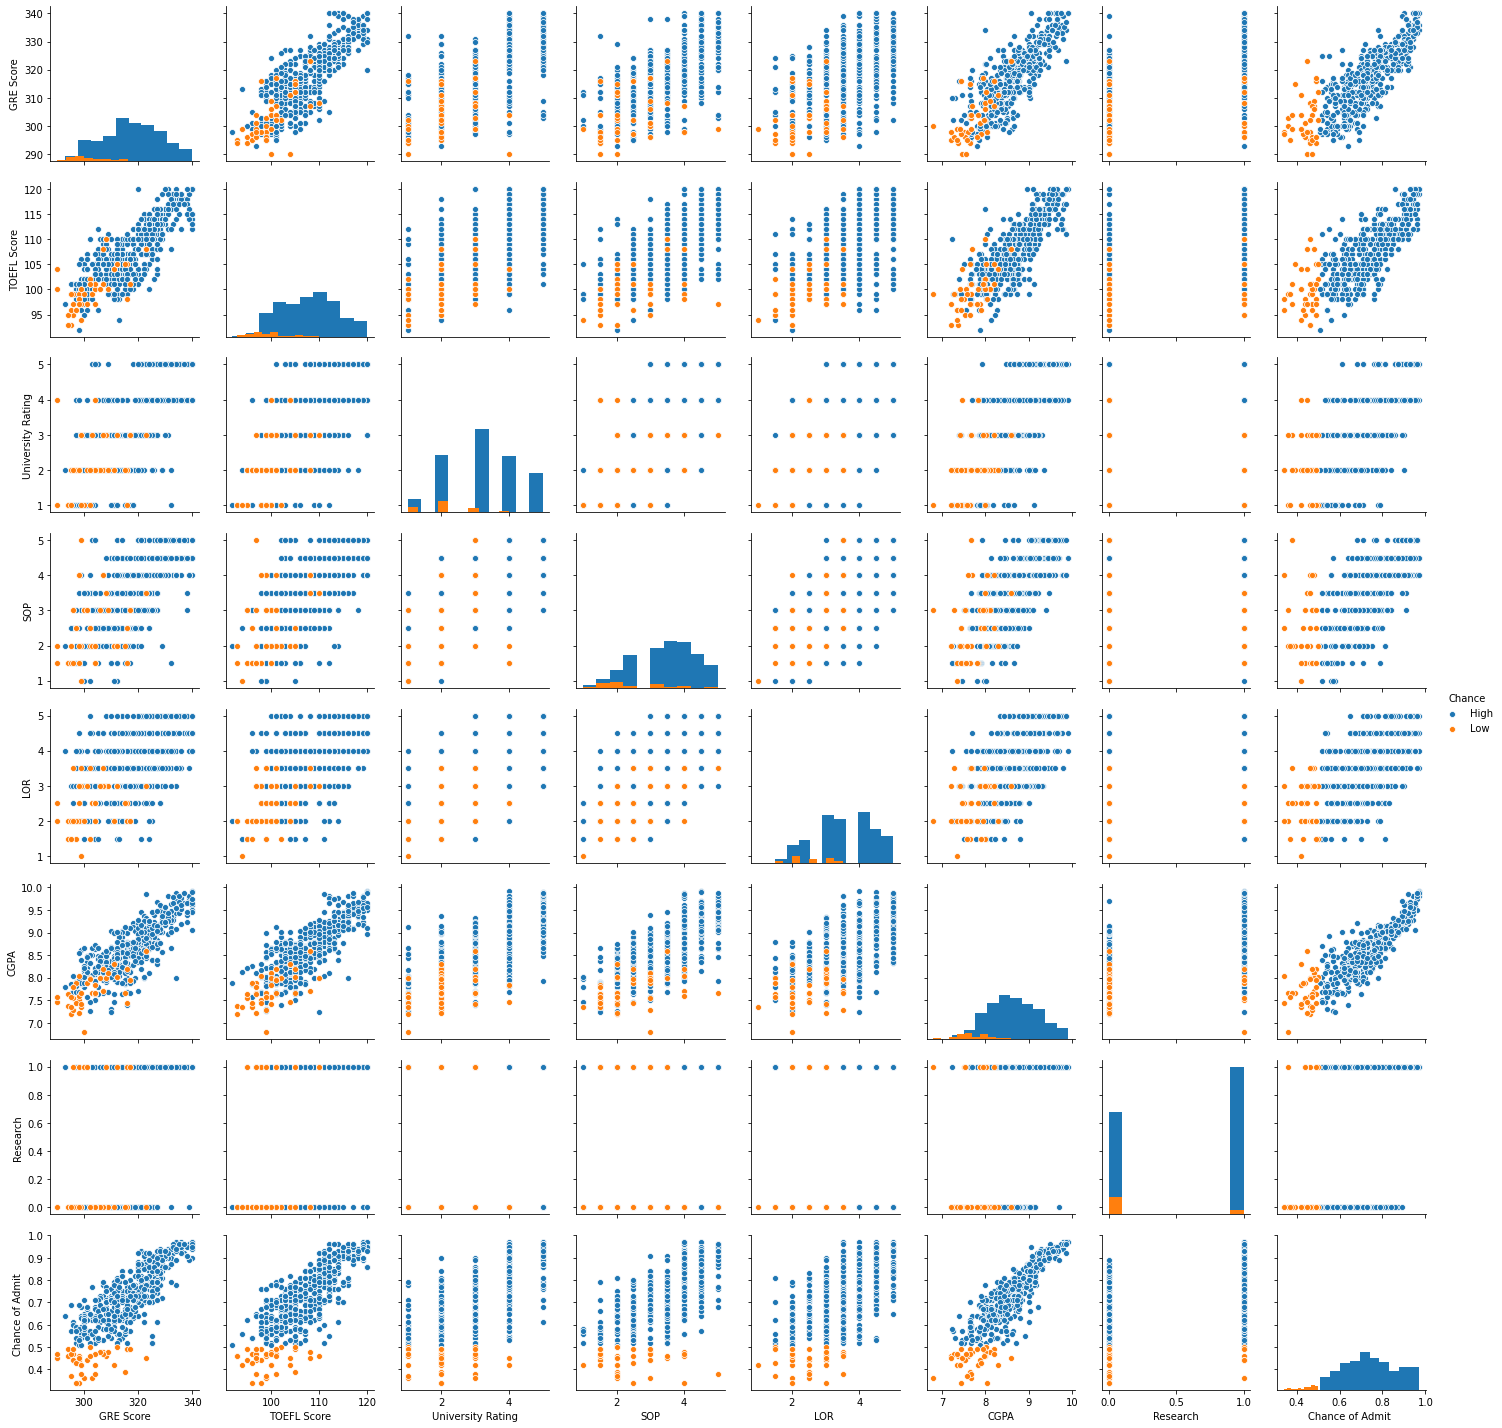

In [43]:
## Let's see pairplot

sns.pairplot(df, hue = 'Chance', diag_kind = 'hist')

### Descriptive using Ordinary Least Square (OLS) and checking for residuals

In [5]:
# separating the independent and dependent variables
data = df.drop(['Chance of Admit ', 'Serial No.'], axis = 1)
target = df['Chance of Admit ']

In [5]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [15]:
sm_lm =OLS(target, sm.add_constant(data))
result = sm_lm.fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          8.21e-180
Time:                        10:37:04   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.104    -12.232      0.000      -1.481      -1.071
GRE Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL Score           0.0028      0.001      3.184      0.002       0.001       0.004
University Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
result.resid

0     -0.031883
1     -0.044031
2      0.066552
3      0.055481
4      0.018450
         ...   
495    0.032260
496   -0.030314
497   -0.018146
498    0.027350
499    0.017114
Length: 500, dtype: float64

In [18]:
#inspecting if our residual (resid) following the normal distribution or not
#turns out the residual did not follow normal distribution

from scipy.stats import shapiro, normaltest, anderson

def try_norm(data):
    result = {'Anderson': {i:j for i, j in zip(anderson(data)[2], anderson(data)[1])}, 
             'Shapiro' : shapiro(data)[1],
             'K^2' : normaltest(data)[1]} # kolmogorov test - 
    result['Anderson']['stat'] = anderson(data)[0]
    return result

try_norm(result.resid)

{'Anderson': {15.0: 0.571,
  10.0: 0.651,
  5.0: 0.781,
  2.5: 0.911,
  1.0: 1.083,
  'stat': 10.076874709760943},
 'Shapiro': 4.8260244270900005e-15,
 'K^2': 3.2527473400941157e-25}

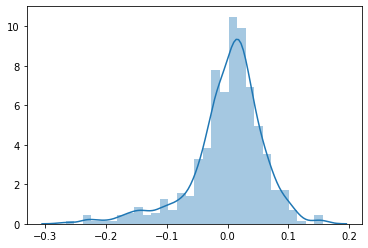

In [19]:
sns.distplot(result.resid)

In [20]:
# Checking for autocorrelation to ensure the absence of autocorrelation
# using Ljungbox test
#H0 = Autocorrelation is absent
#H1 = Autocorrelation is present
## Turns out the autocorrelation is present

from statsmodels.stats import diagnostic

diagnostic.acorr_ljungbox(result.resid, lags = 1)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([182.09746364]), array([1.68839179e-41]))

In [21]:
# Checking for heteroscedasticity to ensure the absence of heteroscedasticity
# using Goldfeld Quandt
#H0 = Error terms are homoscedastic (constant variance)
#H1 = Error terms are heteroscedastic
## Result: The error terms are homoscedastic

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F Statistic', 'p-value']

test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name,test)

[('F Statistic', 0.4494044330462437), ('p-value', 0.9999999995739839)]

In [4]:
# Inspecting VIF (Variance Inflation Factor) -- multicollinearity
# There are multicollinearity involving GRE, TOEFL score and CGPA

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data.values,j) for j in range (data.shape[1])]
pd.Series(vif, index = data.columns, name = 'VIF')

GRE Score            1308.061089
TOEFL Score          1215.951898
University Rating      20.933361
SOP                    35.265006
LOR                    30.911476
CGPA                  950.817985
Research                2.869493
Name: VIF, dtype: float64

Based on the assumption observations, some assumptions for linear regression (parametric) are not followed (normal distribution for error/residual, multicollinearity, autocorrelation)

## Preparing for machine learning model -- Regression case

In [18]:
# Splitting train and test set 
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [20]:
from sklearn import metrics

In [21]:
# Model selection 
## Here I will use several regression models: the basic one (linear regression), ensemble models: RandomForestRegressor
## and XGBoostRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [22]:
## initiate the model in their base mode, without hyperparameter modification

lm = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [23]:
basic_mod = {'Linear Regression': lm, 'Random Forest': rf, 'XGBoost': xgb}

In [24]:
for i, j in basic_mod.items():
    print(i)
    j.fit(X_train, y_train)
    predictions = j.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('\n')

Linear Regression
MAE: 0.04652462859066404
MSE: 0.004655432275026971
RMSE: 0.0682307282316917


Random Forest
MAE: 0.048242
MSE: 0.0047404594000000026
RMSE: 0.06885099418309079


XGBoost
MAE: 0.04948729387919108
MSE: 0.004807309123635154
RMSE: 0.0693347612935615




Here we see that the models are performing quite well, the loss functions are quite minimal across the models. Let's see if there is a change when we scale the independent variables before we fit the models.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale = StandardScaler()

In [27]:
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [28]:
for i, j in basic_mod.items():
    print(i)
    j.fit(X_trains, y_train)
    predictions = j.predict(X_tests)
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('\n')

Linear Regression
MAE: 0.046524628590664
MSE: 0.004655432275026977
RMSE: 0.06823072823169174


Random Forest
MAE: 0.04785199999999999
MSE: 0.004750780800000001
RMSE: 0.0689259080462492


XGBoost
MAE: 0.04923255217075349
MSE: 0.004835179213750497
RMSE: 0.06953545292690985




Standardization of the data did not improve the models performances. To improve the models, usually we can do the hyperparameter tuning. However, I will not tune the hyperparameter for this case. Let's see the feature importance according to XGBoost and RF models.

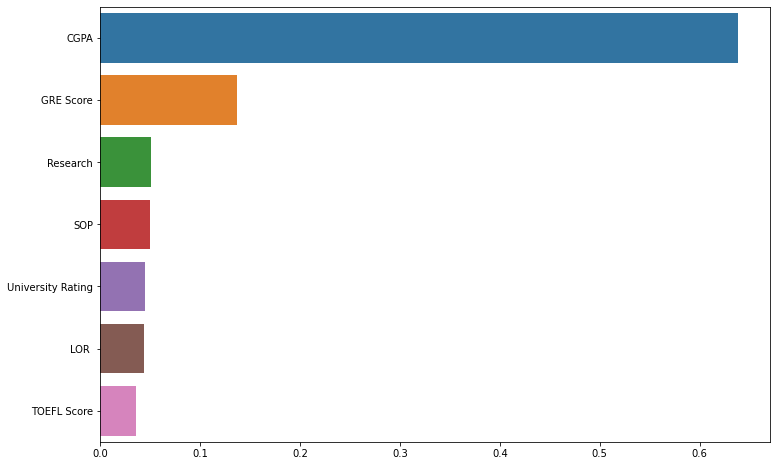

In [29]:
## Plotting based on the xgboost default feature importance

plt.figure(figsize=(12,8))
importance=pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=importance,y=importance.index)

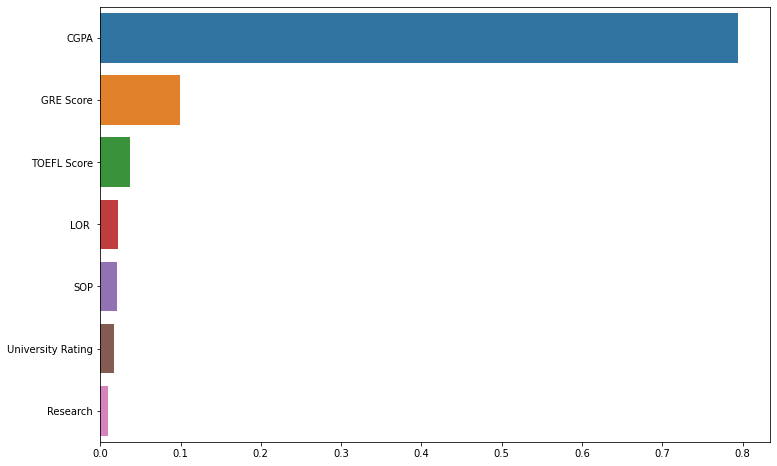

In [30]:
## Plotting based on the RF default feature importance

plt.figure(figsize=(12,8))
importance=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=importance,y=importance.index)

Based on both models (XGBoost and Random Forest), the most important feature is the CGPA, and the second is GRE score. As for the other features, XGB and RF ordered them differently, with research as the least important for RF model, and TOEFL score for XGB. However, it can be seen in order to maximize the Chance of Admit, one should pay attention to his/her GPA and GRE score.